In [14]:
from formater import frmt_vendas
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime, timedelta
import numpy as np

In [15]:
frmt_vendas()

In [70]:
vendas = pd.read_csv('planilhas/dados_anon.csv')
vendas_nfmt = pd.read_csv('planilhas/prods_anom.csv', encoding='utf8')

In [71]:
vendas_nfmt.rename({'prod_anon':'Nome do Produto'}, axis=1, inplace=True)

In [72]:
vendas['Produtos'] = ''
vendas['Preços'] = ''
index = 0
for n, pedido in enumerate(vendas['Número do Pedido']):
    lista_prod = []  
    precos_prod = []
    for i, pedido1 in enumerate(vendas_nfmt['Número do Pedido'][index::]):
        
        if pedido1 == pedido:
            lista_prod.append(vendas_nfmt.loc[i, 'Nome do Produto'])
            precos_prod.append(vendas_nfmt.loc[i, 'Valor do Produto'])
            
        elif pedido1 == pedido and pedido == 100:
                        lista_prod.append(vendas_nfmt.loc[i, 'Nome do Produto'])
                        precos_prod.append(vendas_nfmt.loc[i, 'Valor do Produto'])
                        vendas.at[n, 'Produtos'] = lista_prod
                        vendas.at[n, 'Preços'] = precos_prod  
                        index = i
        else:
            if pedido1 == 100:
                vendas.at[n, 'Produtos'] = lista_prod
                vendas.at[n, 'Preços'] = precos_prod

In [73]:
vendas#[vendas['Estado']=='AC']

,Número do Pedido,E-mail,Data,Status do Pedido,Status do Pagamento,Subtotal,Desconto,Valor do Frete,Total,Endereço,...,Cidade,Estado,Forma de Entrega,Forma de Pagamento,Cupom de Desconto,Data de pagamento,Canal,cliente,Produtos,Preços
0,1191,tallycris95@gmail.com,2022-03-22,Aberto,Confirmado,89.90,0.00,17.17,107.07,Rua Grécia,...,São Francisco do Sul,SC,Jadlog - .Com (via Melhor Envio),Mercado Pago,NaN,2022-03-22,Mobile,cliente50,[ produto177],[89.9]
1,1190,gleycehellensantos15@gmail.com,2022-03-22,Aberto,Confirmado,139.90,0.00,20.18,160.08,Rua Dona Maroca,...,Itacarambi,MG,Correios - PAC (via Melhor Envio),Mercado Pago,NaN,2022-03-22,Mobile,cliente590,[ produto174],[139.9]
2,1189,mariadudinha12dias@gmail.com,2022-03-21,Aberto,Pendente,39.45,1.97,23.80,61.28,Vitório Pinoti,...,Santa Adélia,SP,Jadlog - .Com (via Melhor Envio),PIX,NaN,NaN,Mobile,cliente647,[ produto242],[39.45]
3,1188,ananeoliveira108@gmail.com,2022-03-21,Aberto,Confirmado,89.90,4.50,23.39,108.79,Rua 40,...,Palmas,TO,Jadlog - .Package (via Melhor Envio),PIX,NaN,2022-03-21,Mobile,cliente855,[ produto177],[89.9]
4,1187,manuborges87@hotmail.com,2022-03-20,Aberto,Confirmado,89.90,4.50,15.95,101.35,Rua Ermênio Oliveira Penteado,...,Campinas,SP,Jadlog - .Com (via Melhor Envio),PIX,NaN,2022-03-20,Mobile,cliente308,[ produto70],[89.9]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,108,leticiamarques19@yahoo.com.br,2021-04-06,Arquivado,Confirmado,225.80,22.58,20.03,223.25,Rua Ponte Juca Peixoto,...,Caeté,MG,Correios - PAC (via Melhor Envio),PagSeguro,PRIMEIRACOMPRA,2021-04-06,Mobile,cliente739,"[ produto228, produto228]","[112.9, 112.9]"
1088,107,camillybatista53@gmail.com,2021-04-05,Arquivado,Confirmado,54.00,0.00,24.34,78.34,Rua Rio Araça,...,São Paulo,SP,Correios - PAC (via Melhor Envio),PagSeguro,NaN,2021-04-07,Mobile,cliente79,[ produto351],[54.0]
1089,106,thaissalvatore01@gmail.com,2021-04-03,Arquivado,Confirmado,178.70,0.00,0.00,178.70,Rua Maria da Gloria Costa,...,Muriaé,MG,Motoboy grátis em Muriaé,PIX,NaN,2021-04-05,Mobile,cliente411,"[ produto10, produto290, produto290]","[78.9, 49.9, 49.9]"
1090,105,kellyufla@hotmail.com,2021-03-30,Arquivado,Confirmado,83.80,0.00,0.00,83.80,Rua Mário Rodrigues Pereira,...,Muriaé,MG,Motoboy grátis em Muriaé,PagSeguro,NaN,2021-03-30,Mobile,cliente660,"[ produto118, produto169]","[23.9, 59.9]"


In [19]:
vendas_nfmt.groupby(['tamanho']).sum().drop('Número do Pedido', axis=1).sort_values('Valor do Produto', ascending=False)

,Valor do Produto
tamanho,
M,27436.35
G,25838.15
1 ano,19623.00
P,18912.10
2 anos,15151.30
3 anos,5287.05
GG,2325.05
4 anos,1642.60
0 a 6 meses,815.90


In [20]:
def produtos_vendidos_benchmark(vendas):

    produtos = list()
    for lista in vendas['Produtos']:
        for prod in lista:
            produtos.append(prod)
    precos = list()        
    for lista in vendas['Preços']:
        for prec in lista:
            precos.append(prec)
    unidades = list()
    for prod in produtos:
        unidades.append(produtos.count(prod))

    unidades_produtos = pd.DataFrame(data={'Produto': produtos, 'Preços': precos})
    produtos_agrup = unidades_produtos.groupby('Produto', as_index=False).sum()
    contagem = unidades_produtos[['Produto', 'Preços']].groupby('Produto', as_index=False).count()
    produtos_agrup['Unidades'] = contagem['Preços']
    produtos_agrup = produtos_agrup.sort_values('Preços', ascending=False, ignore_index=True)

    return produtos_agrup

In [22]:
def produtos_por_estado(vendas, estados):    
    estados['Quantidades'] = ''

    for i, estado in enumerate(estados['Estado']):
        for n, estado2 in enumerate(vendas['Estado']):
            if estado==estado2:
                lista = vendas['Produtos'][n]
                
                tamanho = len(lista)
                x = 0
                while x < tamanho:
                    estados['Produtos'][i].append(lista[x])

                    x += 1
                else:
                    pass
            else:
                
                pass
    return estados.sort_values('Receita', ascending=False, ignore_index=True)

In [24]:
def agrega_estados(vendas):
    
    estados = vendas[['Estado', 'Total']].groupby('Estado', as_index=False).sum()
    estados['Produtos'] = np.empty((len(estados), 0)).tolist()
    estados.rename(columns={'Total': 'Receita'}, inplace=True)
    
    return estados

In [31]:
def conta_produtos_vendidos_estados_agg(estados):

    for i, produtos in enumerate(estados['Produtos']):
        contador = []
        prod = []

        contador_ord = []
        prod_ord = []
            
        for produto in produtos:
            if produto not in prod:
                contador.append(produtos.count(produto))
                prod.append(produto)

        for c in contador:
            maior_contagem = np.max(contador)
            indice = contador.index(maior_contagem)

            contador_ord.append(maior_contagem)
            prod_ord.append(prod[indice])

            del contador[indice], prod[indice]

        estados['Produtos'][i] = prod_ord
        estados['Quantidades'][i] = contador_ord
    
    return estados

In [1]:
def plotagem_mais_vendidos_por_estado(estados, indice, save=False):

    data = datetime.strftime(datetime.today(), '%d/%m/%Y %H:%M')
    indice = indice
    est = estados['Estado'][indice]

    plt.figure(figsize=(12,10), facecolor='#363636')
    ax = plt.axes()
    ax.set(facecolor='#363636')

    ax.barh(estados['Produtos'][indice][0:15], estados['Quantidades'][indice][0:15], color='orange')
    ax.set_title(f'Produtos mais vendidos em {est} até {data}', color='white')
    ax.set_xlabel('Quantidade', fontsize=16, color='white')

    plt.yticks(color='white', fontsize=12)
    plt.xticks(color='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    
    if save:
        
        plt.savefig('graficos/prod_mais_vendios_{}'.format(est),
                bbox_inches='tight')

In [77]:
estados = agrega_estados(vendas)
estados = produtos_por_estado(vendas, estados)
estados = conta_produtos_vendidos_estados_agg(estados)

<ipython-input-31-9c0dfeeb5363>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados['Produtos'][i] = prod_ord
<ipython-input-31-9c0dfeeb5363>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados['Quantidades'][i] = contador_ord


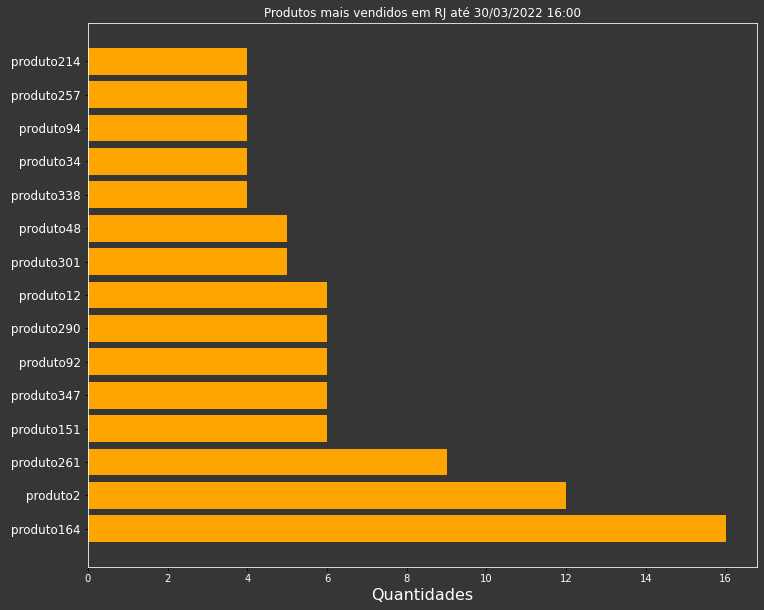

In [85]:
plotagem_mais_vendidos_por_estado(estados, 3, save=True)